In [1]:
import sys
sys.path.append('../')

In [2]:
import data
from pathlib import Path

Using config.dataReader - random number


In [3]:
data_path = Path('../test_data/raghav_game')

In [4]:
game_data = data.load_all_pickle_files(data_path,vstack=True)
print(game_data.shape)

Loading data from ../test_data/raghav_game 
First 10 epochs will be removed while loading the data.
Loading File: [f]raghav_game_eyes_closed|301019_135051.pickle
Using vstack=True
(590, 8, 250)


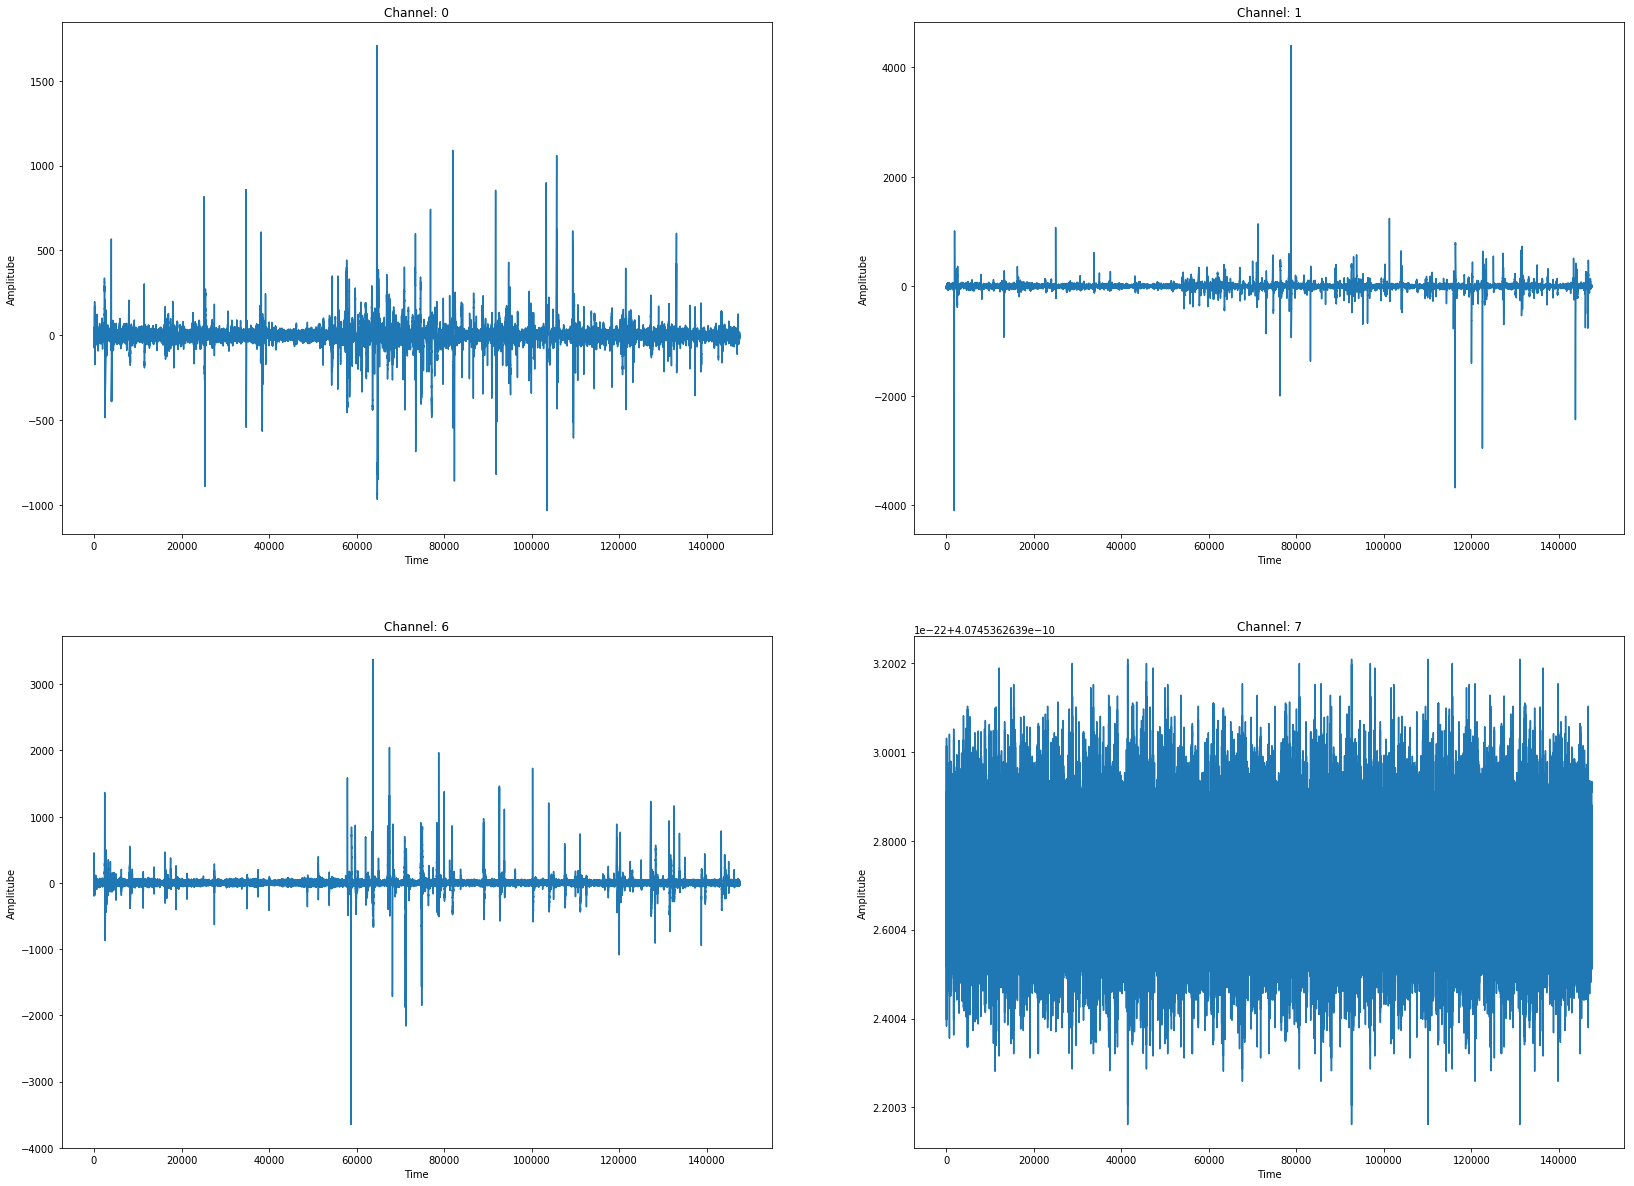

In [5]:
data.plot_signal(game_data,channels=[0,1,6,7])

In [6]:
from features import max_val
clean_data = max_val(game_data,threshold=400)

In [7]:
clean_data.shape

(452, 8, 250)

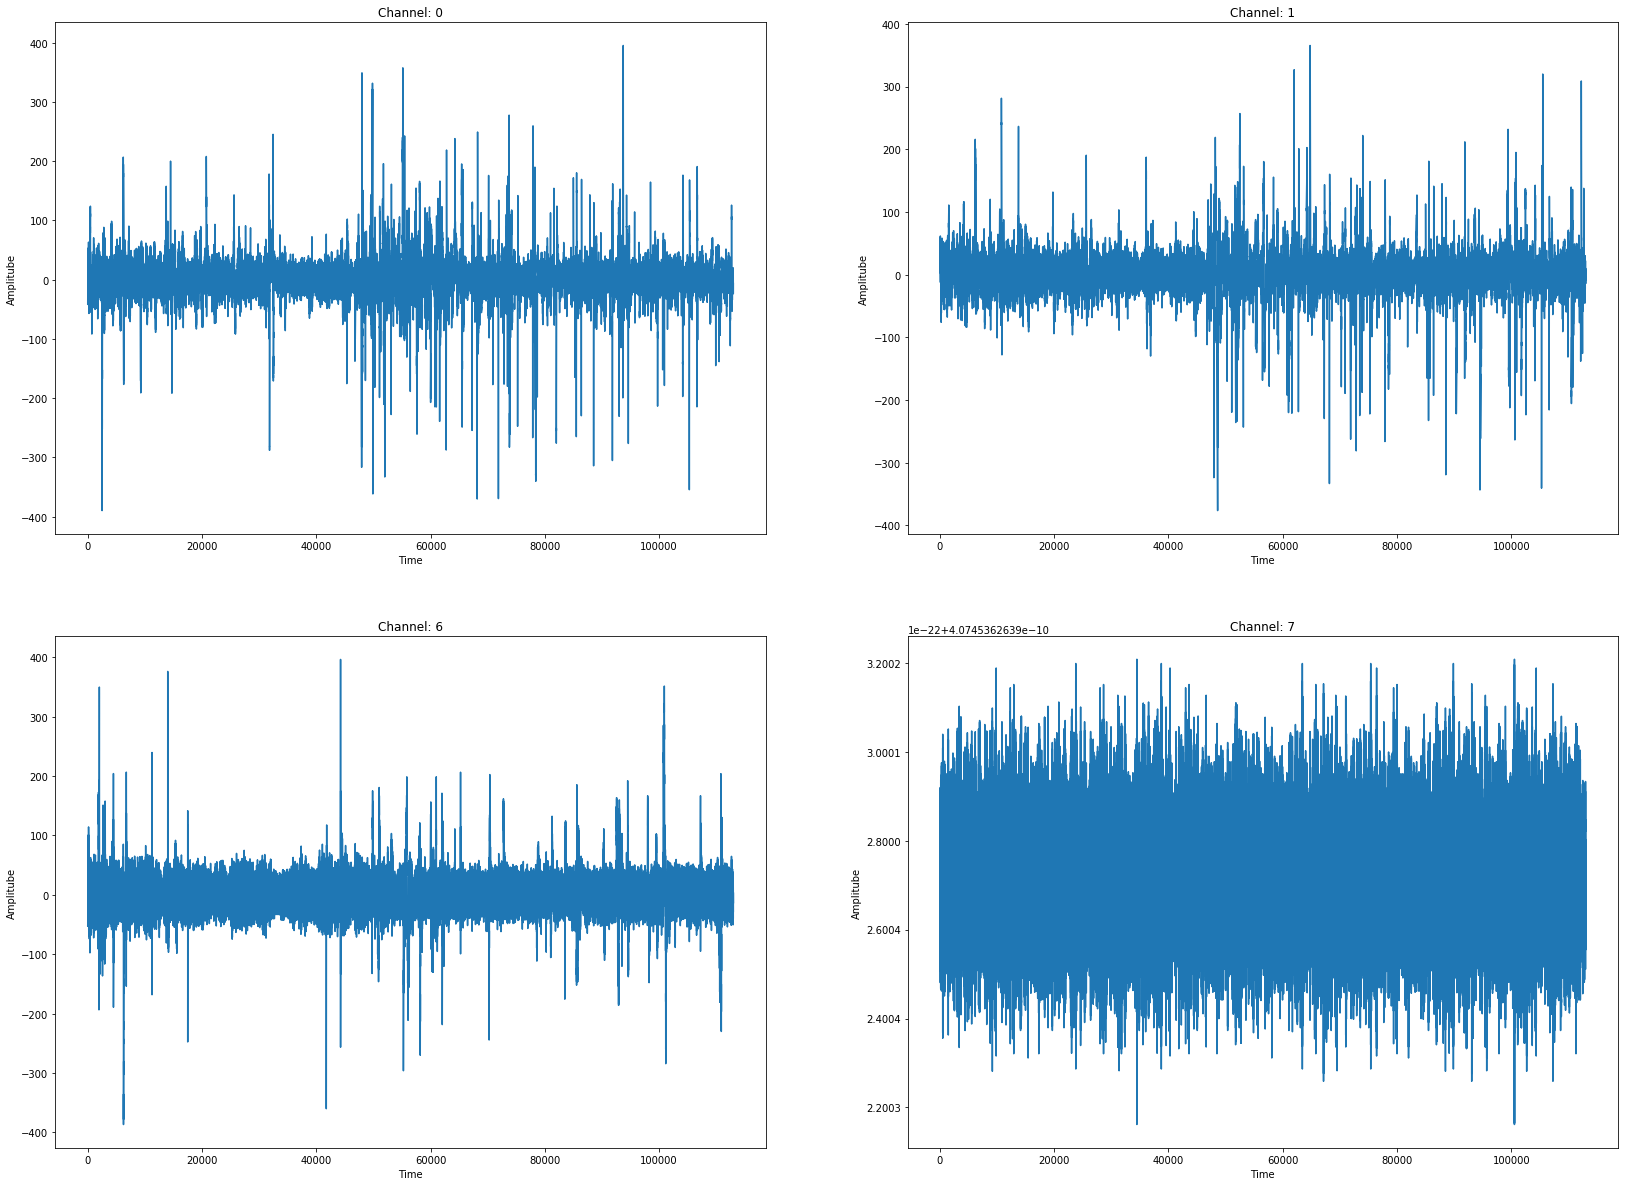

In [8]:
data.plot_signal(clean_data,channels=[0,1,6,7])

In [9]:
import data as d
out = d.epoch_bandpower(clean_data,per_epoch=1,channels=range(8))

Processing file:1


/usr/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 500 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


In [10]:
out.shape

(452, 8, 5)

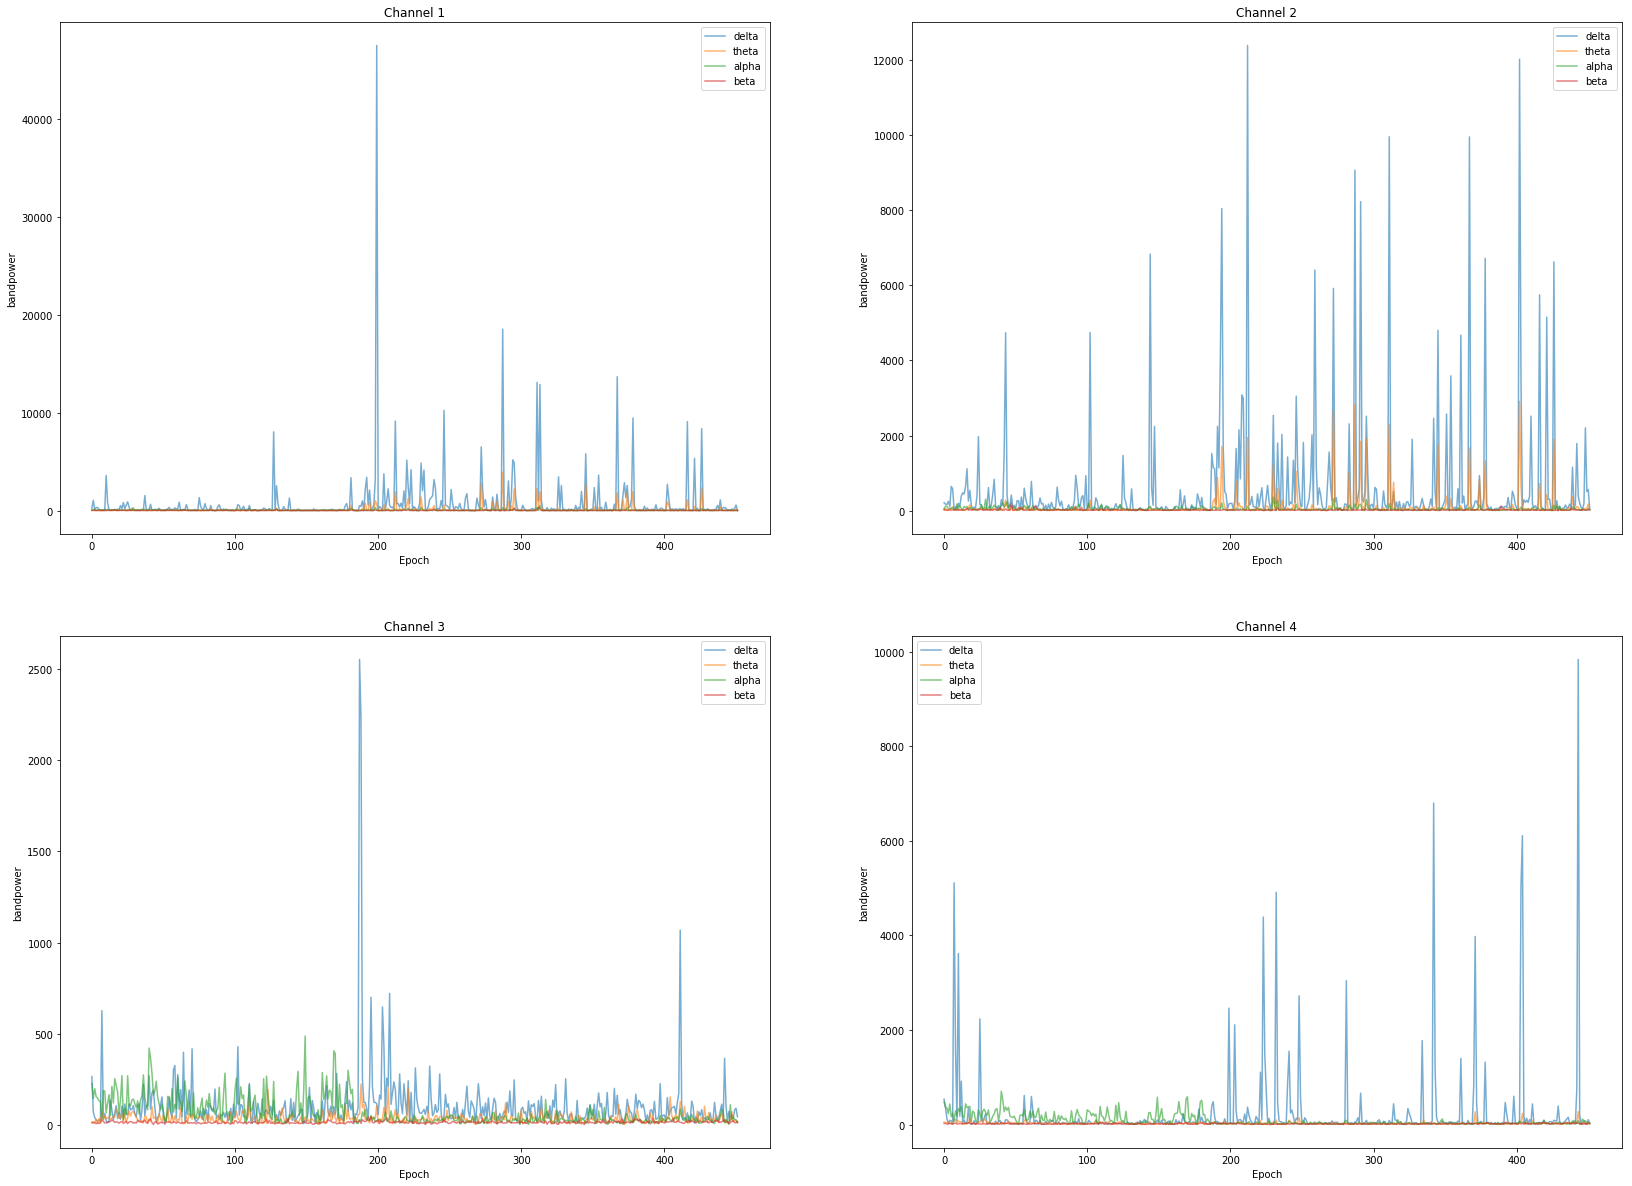

In [18]:
%matplotlib inline
import numpy as np
d.plot_bandpower(out, channels=[0,1,5,6])

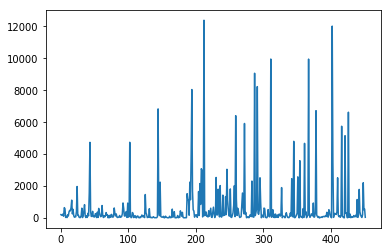

In [12]:
import matplotlib.pyplot as plt
plt.plot(out[:,1,0])

In [13]:
from sklearn.decomposition import PCA

In [14]:
game_data.shape

(590, 8, 250)

In [15]:
ica = PCA(n_components=8)
S_ = ica.fit_transform(game_data.transpose(1,0,2).reshape(8,-1))

In [16]:
S_.shape

(8, 8)